In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, warnings, os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

# Track data loading
import psutil
import time

# Save & Load results
import pickle

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

import datetime
from scipy import optimize

from itertools import product

# 1. Visualisation: 10%

In [3]:
save_address = "results/epiSim/epiProp_1Month/filtered_R0_arr_10percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_1month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_3Month/filtered_R0_arr_10percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_3month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_6Month/filtered_R0_arr_10percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_6month = pickle.load(file)

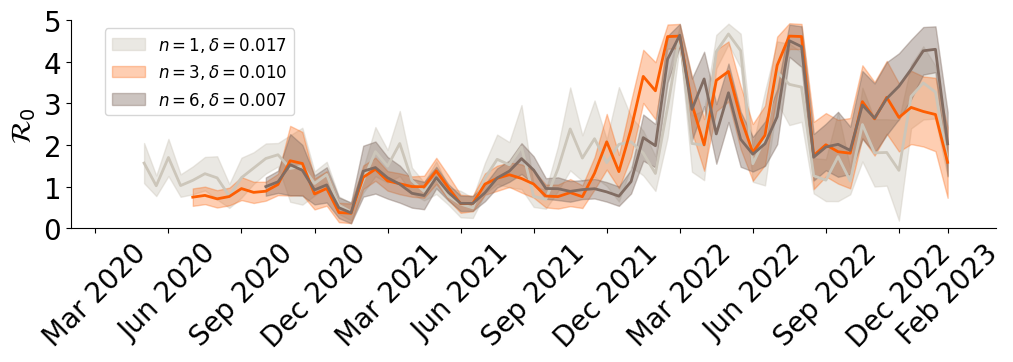

In [4]:
fig, axs = plt.subplots(figsize = (10, 3.5), constrained_layout = True)

##### 1 month #####
y1 = np.average(filtered_R0_arr_1month, axis = 1)
std1 = np.std(filtered_R0_arr_1month, axis = 1)
x1 = np.arange(0, len(y1), 1)

plt.plot(x1, y1, linewidth = 2, color = "#ccc6ba")
plt.fill_between(x1, y1 - std1, y1 + std1, alpha = 0.4, color = "#ccc6ba", label = r"$n = 1, \delta = 0.017$")

##### 3 month #####
y2 = np.average(filtered_R0_arr_3month, axis = 1)
std2 = np.std(filtered_R0_arr_3month, axis = 1)
x2 = np.arange(0, len(y2), 1) + 4

plt.plot(x2, y2, linewidth = 2, color = "#FD5E02")
plt.fill_between(x2, y2 - std2, y2 + std2, alpha = 0.3, color = "#FD5E02", label = r"$n = 3, \delta = 0.010$")

##### 6 month #####
y3 = np.average(filtered_R0_arr_6month, axis = 1)
std3 = np.std(filtered_R0_arr_6month, axis = 1)
x3 = np.arange(0, len(y3), 1) + 10

plt.plot(x3, y3, linewidth = 2, color = "#816c62")
plt.fill_between(x3, y3 - std3, y3 + std3, alpha = 0.4, color = "#816c62", label = r"$n = 6, \delta = 0.007$")

##### Timeline #####
index = list(np.array([(i)*6 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]) - 4) + [66]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.xlim(-6, 70)
plt.ylim(0, 5)

plt.ylabel(r'$\mathcal{R}_0$', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

plt.legend(fontsize = 12, loc = 'best', bbox_to_anchor=(0.25, 1))
fig.savefig('figures/fig4d.png', dpi=400, bbox_inches = 'tight')

# 2. Visualisation: 5% (SM)

In [15]:
save_address = "results/epiSim/epiProp_1Month/filtered_R0_arr_5percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_1month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_3Month/filtered_R0_arr_5percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_3month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_6Month/filtered_R0_arr_5percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_6month = pickle.load(file)

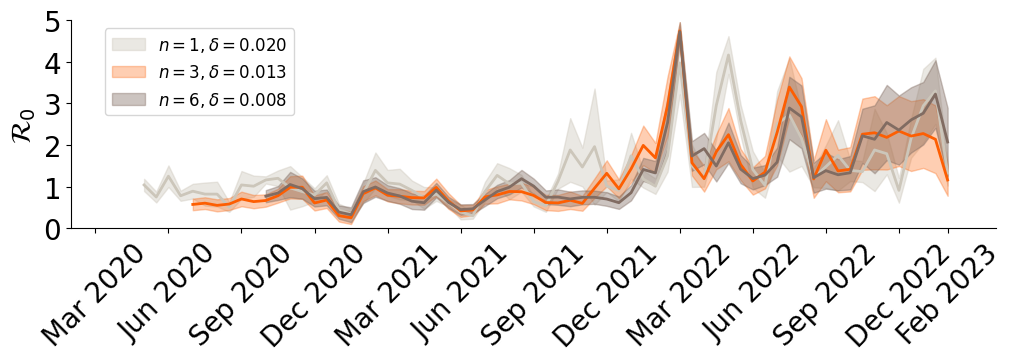

In [16]:
fig, axs = plt.subplots(figsize = (10, 3.5), constrained_layout = True)

##### 1 month #####
y1 = np.average(filtered_R0_arr_1month, axis = 1)
std1 = np.std(filtered_R0_arr_1month, axis = 1)
x1 = np.arange(0, len(y1), 1)

plt.plot(x1, y1, linewidth = 2, color = "#ccc6ba")
plt.fill_between(x1, y1 - std1, y1 + std1, alpha = 0.4, color = "#ccc6ba", label = r"$n = 1, \delta = 0.020$")

##### 3 month #####
y2 = np.average(filtered_R0_arr_3month, axis = 1)
std2 = np.std(filtered_R0_arr_3month, axis = 1)
x2 = np.arange(0, len(y2), 1) + 4

plt.plot(x2, y2, linewidth = 2, color = "#FD5E02")
plt.fill_between(x2, y2 - std2, y2 + std2, alpha = 0.3, color = "#FD5E02", label = r"$n = 3, \delta = 0.013$")

##### 6 month #####
y3 = np.average(filtered_R0_arr_6month, axis = 1)
std3 = np.std(filtered_R0_arr_6month, axis = 1)
x3 = np.arange(0, len(y3), 1) + 10

plt.plot(x3, y3, linewidth = 2, color = "#816c62")
plt.fill_between(x3, y3 - std3, y3 + std3, alpha = 0.4, color = "#816c62", label = r"$n = 6, \delta = 0.008$")

##### Timeline #####
index = list(np.array([(i)*6 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]) - 4) + [66]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.xlim(-6, 70)
plt.ylim(0, 5)

plt.ylabel(r'$\mathcal{R}_0$', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

plt.legend(fontsize = 12, loc = 'best', bbox_to_anchor=(0.25, 1))
fig.savefig('figures/SM_fig8d.png', dpi=400, bbox_inches = 'tight')

# 3. Visualisation: 20% (SM)

In [17]:
save_address = "results/epiSim/epiProp_1Month/filtered_R0_arr_20percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_1month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_3Month/filtered_R0_arr_20percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_3month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_6Month/filtered_R0_arr_20percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_6month = pickle.load(file)

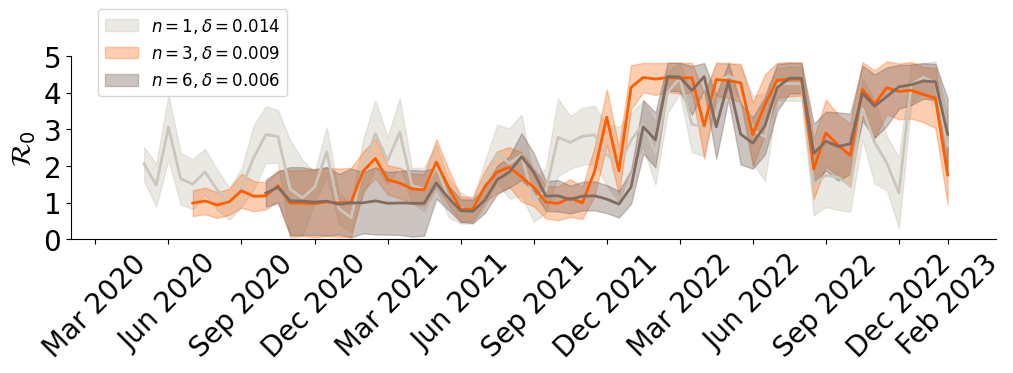

In [40]:
fig, axs = plt.subplots(figsize = (10, 3.5), constrained_layout = True)

##### 1 month #####
y1 = np.average(filtered_R0_arr_1month, axis = 1)
std1 = np.std(filtered_R0_arr_1month, axis = 1)
x1 = np.arange(0, len(y1), 1)

plt.plot(x1, y1, linewidth = 2, color = "#ccc6ba")
plt.fill_between(x1, y1 - std1, y1 + std1, alpha = 0.4, color = "#ccc6ba", label = r"$n = 1, \delta = 0.014$")

##### 3 month #####
y2 = np.average(filtered_R0_arr_3month, axis = 1)
std2 = np.std(filtered_R0_arr_3month, axis = 1)
x2 = np.arange(0, len(y2), 1) + 4

plt.plot(x2, y2, linewidth = 2, color = "#FD5E02")
plt.fill_between(x2, y2 - std2, y2 + std2, alpha = 0.3, color = "#FD5E02", label = r"$n = 3, \delta = 0.009$")

##### 6 month #####
y3 = np.average(filtered_R0_arr_6month, axis = 1)
std3 = np.std(filtered_R0_arr_6month, axis = 1)
x3 = np.arange(0, len(y3), 1) + 10

plt.plot(x3, y3, linewidth = 2, color = "#816c62")
plt.fill_between(x3, y3 - std3, y3 + std3, alpha = 0.4, color = "#816c62", label = r"$n = 6, \delta = 0.006$")

##### Timeline #####
index = list(np.array([(i)*6 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]) - 4) + [66]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.xlim(-6, 70)
plt.ylim(0, 5)

plt.ylabel(r'$\mathcal{R}_0$', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

plt.legend(fontsize = 12, loc = 'upper left', bbox_to_anchor=(0.02, 1.3))
fig.savefig('figures/SM_fig9d.png', dpi=400, bbox_inches = 'tight')

# 4. Visualisation: 50% (SM)

In [41]:
save_address = "results/epiSim/epiProp_1Month/filtered_R0_arr_50percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_1month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_3Month/filtered_R0_arr_50percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_3month = pickle.load(file)
    
save_address = "results/epiSim/epiProp_6Month/filtered_R0_arr_50percent.pkl"
with open(save_address, "rb") as file:
    filtered_R0_arr_6month = pickle.load(file)

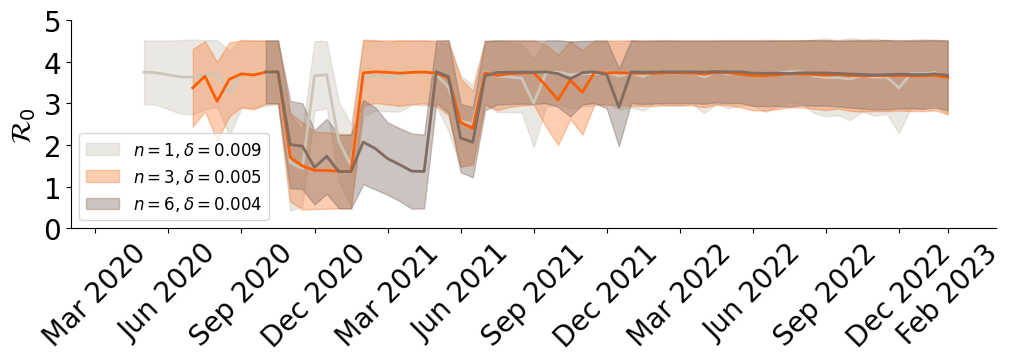

In [55]:
fig, axs = plt.subplots(figsize = (10, 3.5), constrained_layout = True)

##### 1 month #####
y1 = np.average(filtered_R0_arr_1month, axis = 1)
std1 = np.std(filtered_R0_arr_1month, axis = 1)
x1 = np.arange(0, len(y1), 1)

plt.plot(x1, y1, linewidth = 2, color = "#ccc6ba")
plt.fill_between(x1, y1 - std1, y1 + std1, alpha = 0.4, color = "#ccc6ba", label = r"$n = 1, \delta = 0.009$")

##### 3 month #####
y2 = np.average(filtered_R0_arr_3month, axis = 1)
std2 = np.std(filtered_R0_arr_3month, axis = 1)
x2 = np.arange(0, len(y2), 1) + 4

plt.plot(x2, y2, linewidth = 2, color = "#FD5E02")
plt.fill_between(x2, y2 - std2, y2 + std2, alpha = 0.3, color = "#FD5E02", label = r"$n = 3, \delta = 0.005$")


##### 6 month #####
y3 = np.average(filtered_R0_arr_6month, axis = 1)
std3 = np.std(filtered_R0_arr_6month, axis = 1)
x3 = np.arange(0, len(y3), 1) + 10

plt.plot(x3, y3, linewidth = 2, color = "#816c62")
plt.fill_between(x3, y3 - std3, y3 + std3, alpha = 0.4, color = "#816c62", label = r"$n = 6, \delta = 0.004$")

##### Timeline #####
index = list(np.array([(i)*6 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]) - 4) + [66]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.xlim(-6, 70)
plt.ylim(0, 5)

plt.ylabel(r'$\mathcal{R}_0$', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

plt.legend(fontsize = 12, loc = 'lower left', bbox_to_anchor=(0, 0))
fig.savefig('figures/SM_fig10d.png', dpi=400, bbox_inches = 'tight')